In [42]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Current Data
The file I've been collecting data in on a raspberry pi:

In [43]:
file = 'Covidiot2.csv'

In [44]:
covid_df = pd.read_csv(file, sep='\t', usecols=['datetime', 'USA', 'Canada', 'Mexico', 'Italy', 'France', 
                                              'Germany', 'Spain', 'UK', 'Japan', 'S. Korea', 'India', 
                                              'Philippines', 'Brazil', 'Venezuela', 'Peru', 'South Africa', 
                                              'Egypt', 'Nigeria', 'Ethiopia', 'Iran', 'Israel', 'Australia'])

In [45]:
covid_df['datetime'] = pd.to_datetime(covid_df['datetime'])

In [46]:
covid_df.head()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Brazil,Venezuela,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia
0,2020-04-28 19:23:07.143794,0.3124,0.1325,0.0120,0.3333,0.2542,0.1907,0.4965,0.2374,0.0108,...,0.0343,0.0012,0.0946,0.0084,0.0049,0.0006,0.0001,0.1102,0.1817,0.0264
1,2020-04-28 19:25:44.847000,0.3124,0.1325,0.0120,0.3333,0.2542,0.1907,0.4965,0.2374,0.0108,...,0.0343,0.0012,0.0946,0.0084,0.0049,0.0006,0.0001,0.1102,0.1817,0.0264
2,2020-04-29 05:15:02.500926,0.3129,0.1325,0.0130,0.3333,0.2542,0.1909,0.4965,0.2374,0.0109,...,0.0345,0.0012,0.0946,0.0084,0.0049,0.0007,0.0001,0.1102,0.1823,0.0264
3,2020-04-29 17:15:03.052925,0.3188,0.1357,0.0130,0.3367,0.2550,0.1924,0.5067,0.2434,0.0109,...,0.0368,0.0012,0.1029,0.0090,0.0051,0.0007,0.0001,0.1115,0.1823,0.0265
4,2020-04-30 05:15:03.093615,0.3216,0.1367,0.0138,0.3367,0.2550,0.1928,0.5067,0.2434,0.0110,...,0.0375,0.0012,0.1029,0.0090,0.0051,0.0008,0.0001,0.1115,0.1834,0.0265


# Linear Prediction of U.S. Covid-19 Rate:

### Date 
Instead of datetime, the dates are converted into hours from the start date of data collection (4/28/20). This format can more easily be applied to regression models. 

In [47]:
start_date = covid_df.loc[0, 'datetime']
covid_df['datetime start'] = start_date
covid_df['timedelta (hours)'] = (covid_df['datetime'] - covid_df['datetime start']).astype('timedelta64[h]')

In [48]:
covid_df.tail()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia,datetime start,timedelta (hours)
150,2020-08-27 10:45:19.395878,1.758861,0.334949,0.445106,0.434224,0.388499,0.283988,0.897981,0.484409,0.051130,...,1.860308,1.038129,0.095593,0.025721,0.039335,0.432611,1.258894,0.098844,2020-04-28 19:23:07.143794,2895.0
151,2020-08-28 10:45:18.722986,1.772731,0.336091,0.449780,0.436555,0.397861,0.285863,0.918638,0.486651,0.051846,...,1.886448,1.042488,0.095825,0.025865,0.040367,0.437889,1.275519,0.099302,2020-04-28 19:23:07.143794,2919.0
152,2020-08-29 10:45:18.628569,1.787732,0.337442,0.454297,0.438970,0.409166,0.287628,0.939553,0.488531,0.052518,...,1.910602,1.045585,0.096043,0.025942,0.041874,0.440407,1.293970,0.099797,2020-04-28 19:23:07.143794,2943.0
153,2020-08-30 10:45:18.004836,1.801068,0.338277,0.458931,0.441358,0.417520,0.288565,0.939553,0.490163,0.053183,...,1.939336,1.049679,0.096250,0.026063,0.043191,0.442675,1.312721,0.100185,2020-04-28 19:23:07.143794,2967.0
154,2020-08-31 10:45:18.725250,1.811817,0.338984,0.462133,0.443615,0.425813,0.289293,0.939553,0.492689,0.053658,...,1.962783,1.053903,0.096475,0.026130,0.044468,0.444764,1.317307,0.100667,2020-04-28 19:23:07.143794,2991.0


### Sklearn Regression
The linear regression class learns from the existing US rate/dates

In [49]:
X_train = covid_df[['timedelta (hours)']]
Y_train = covid_df[['USA']]

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The same x values plus an additional timedelta (of 480 hours more than the last reading datetime) are used to predict y

In [50]:
X_test = X_train.copy()
last_reading = covid_df.iloc[-1, -1]
last_entry = X_test.index[-1] + 1
X_test = X_test.append(pd.Series(data={'timedelta (hours)': (last_reading + 480)}, name=last_entry))
X_test.tail()

,timedelta (hours)
151,2919.0
152,2943.0
153,2967.0
154,2991.0
155,3471.0


In [51]:
y_prediction = regressor.predict(X_test)
y_pred = pd.DataFrame(y_prediction, columns=['Predicted Rate'])
y_pred.tail()

,Predicted Rate
151,1.654285
152,1.666222
153,1.678158
154,1.690094
155,1.928819


### Graph and RMSE

Selects 4-5 values to use as xticks on the graphs using a step/range

In [53]:
date_list = [X_test['timedelta (hours)'][i] for i in range(0, len(X_test), 30)]
date_list.append(X_test.iloc[-1, 0]) # if step is uneven, adds last value
date_list

[0.0, 345.0, 717.0, 1449.0, 2175.0, 2895.0, 3471.0]

Converts the xtick values to date strings (from 4/28/20)

In [54]:
first_date = datetime.datetime(year=2020, month=5, day=28)
string_dates = []
for h in date_list:
    date = first_date + datetime.timedelta(hours=h)
    string_dates.append(date.strftime('%d %B, %Y'))

<function matplotlib.pyplot.show(*args, **kw)>

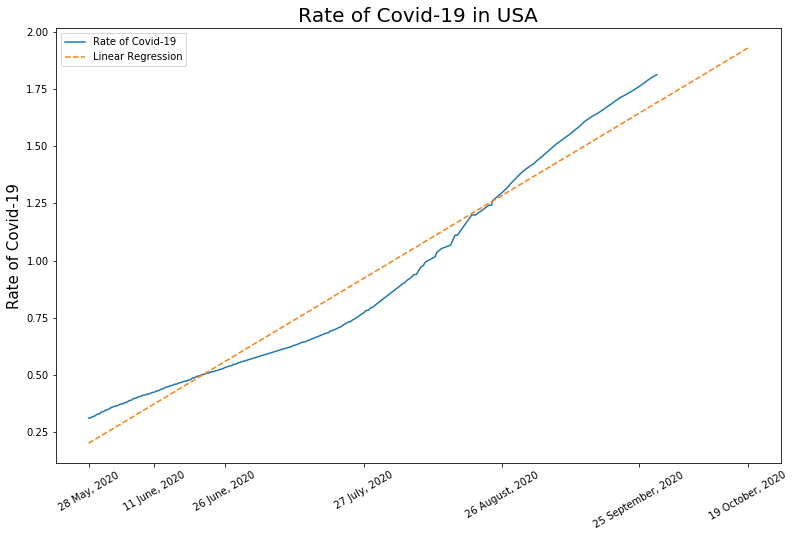

In [55]:
plt.figure(figsize=(13,8))

plt.plot(covid_df['timedelta (hours)'], covid_df['USA'], '-', X_test, y_pred, '--')
    
plt.legend(('Rate of Covid-19', 'Linear Regression'), loc='upper left')
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.xticks(date_list, labels=string_dates, rotation=30)
plt.title('Rate of Covid-19 in USA', fontsize=20)

plt.show

In [56]:
# y_pred[:-1] excludes extra date used for future rate prediction
lin_RMSE = sqrt(mean_squared_error(y_true=covid_df['USA'], y_pred=y_pred[:-1])) 
lin_RMSE

0.09286549209130682

# Polynomial Prediction of U.S. Covid-19 Rate:

In [57]:
covid_df.tail()

,datetime,USA,Canada,Mexico,Italy,France,Germany,Spain,UK,Japan,...,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia,datetime start,timedelta (hours)
150,2020-08-27 10:45:19.395878,1.758861,0.334949,0.445106,0.434224,0.388499,0.283988,0.897981,0.484409,0.051130,...,1.860308,1.038129,0.095593,0.025721,0.039335,0.432611,1.258894,0.098844,2020-04-28 19:23:07.143794,2895.0
151,2020-08-28 10:45:18.722986,1.772731,0.336091,0.449780,0.436555,0.397861,0.285863,0.918638,0.486651,0.051846,...,1.886448,1.042488,0.095825,0.025865,0.040367,0.437889,1.275519,0.099302,2020-04-28 19:23:07.143794,2919.0
152,2020-08-29 10:45:18.628569,1.787732,0.337442,0.454297,0.438970,0.409166,0.287628,0.939553,0.488531,0.052518,...,1.910602,1.045585,0.096043,0.025942,0.041874,0.440407,1.293970,0.099797,2020-04-28 19:23:07.143794,2943.0
153,2020-08-30 10:45:18.004836,1.801068,0.338277,0.458931,0.441358,0.417520,0.288565,0.939553,0.490163,0.053183,...,1.939336,1.049679,0.096250,0.026063,0.043191,0.442675,1.312721,0.100185,2020-04-28 19:23:07.143794,2967.0
154,2020-08-31 10:45:18.725250,1.811817,0.338984,0.462133,0.443615,0.425813,0.289293,0.939553,0.492689,0.053658,...,1.962783,1.053903,0.096475,0.026130,0.044468,0.444764,1.317307,0.100667,2020-04-28 19:23:07.143794,2991.0


## Numpy Polyfit


20 days (480 hours) from the last date of data collection sets the limits for the projection

In [58]:
max_hour = covid_df['timedelta (hours)'].max() + 480
max_hour

3471.0

numpy.polyfit determines the best fit third order polynomial

In [59]:
curve = np.poly1d(np.polyfit(covid_df['timedelta (hours)'], covid_df['USA'], 3)) #third order polynomial
lin_line = np.linspace(0, max_hour, 200)
poly_line = curve(lin_line)

### Graph and RMSE

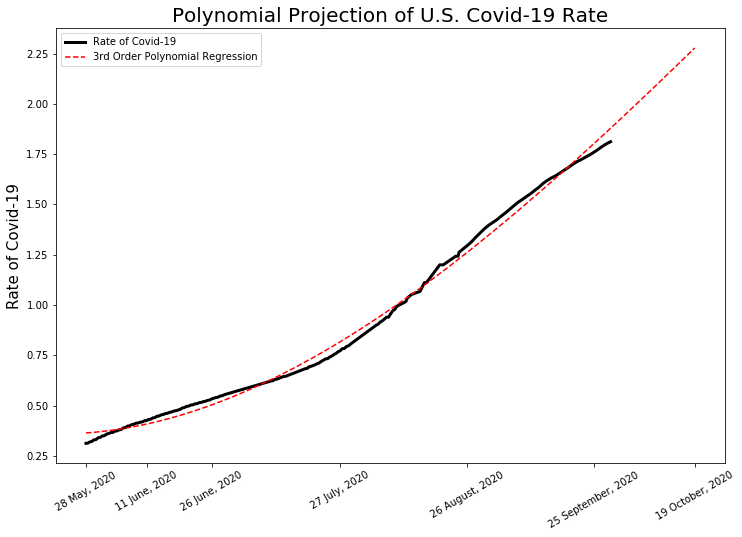

In [60]:
plt.figure(figsize=(12, 8))

plt.plot(covid_df['timedelta (hours)'], covid_df['USA'], linewidth=3, color='k')
plt.plot(lin_line, poly_line, '--', color='r')

plt.legend(('Rate of Covid-19', '3rd Order Polynomial Regression'), loc='upper left')
plt.xticks(date_list, labels=string_dates, rotation=30)
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.title('Polynomial Projection of U.S. Covid-19 Rate', fontsize=20)
plt.show()

In [61]:
Poly_RMSE = sqrt(mean_squared_error(y_true=covid_df['USA'], y_pred=curve(covid_df['timedelta (hours)'])))
Poly_RMSE

0.0316014787484885

## Summary of Projections:

In [62]:
print('Linear Projection RMSE: ' + str(lin_RMSE))
print('Polynomial Projection RMSE: ' + str(Poly_RMSE))
if Poly_RMSE < lin_RMSE:
    print('The polynomial projection is a better fit')
else:
    print('The linear projection is a better fit')

Linear Projection RMSE: 0.09286549209130682
Polynomial Projection RMSE: 0.0316014787484885
The polynomial projection is a better fit
